In [1]:
from segmentation import IDRiDSegmentation, get_transforms

import random
import matplotlib.pyplot as plt
import numpy as np
import json
import torch

In [2]:
train_transform, val_transform = get_transforms([1424, 2144], [1024, 1024], [0.0, 0.0, 0.0], [1.0, 1.0, 1.0])
train_set = IDRiDSegmentation(root='./data/A. Segmentation/', mode='train', transform=train_transform)
val_set = IDRiDSegmentation(root='./data/A. Segmentation/', mode='eval', transform=val_transform)

In [3]:
image, mask = val_set.__getitem__(0)
print(image.shape, mask.shape)
print(torch.unique(mask))

torch.Size([3, 1424, 2144]) torch.Size([5, 1424, 2144])
tensor([0, 1])


In [4]:
image, mask = train_set.__getitem__(0)
print(image.shape, mask.shape)
print(torch.unique(mask))

torch.Size([3, 1024, 1024]) torch.Size([5, 1024, 1024])
tensor([0, 1])


In [5]:
def visualize_image_masks(image, masks, mask_labels=None):
    """
    Visualize an RGB image and its five binary masks overlaid on the image.
    
    Args:
        image (torch.Tensor): RGB image of shape [3, H, W], values in [0, 1].
        masks (torch.Tensor): Binary masks of shape [5, H, W], values in {0, 1}.
        mask_labels (list, optional): Labels for the masks. Defaults to 
            ['Microaneurysms', 'Haemorrhages', 'Hard Exudates', 'Soft Exudates', 'Optic Disc'].
    """
    # Default mask labels if not provided
    if mask_labels is None:
        mask_labels = ['Microaneurysms', 'Haemorrhages', 'Hard Exudates', 'Soft Exudates', 'Optic Disc']
    
    # Convert tensors to NumPy arrays
    image = image.permute(1, 2, 0).cpu().numpy()  # [H, W, 3]
    masks = masks.cpu().numpy()  # [5, H, W]
    
    # Scale image to [0, 255] for display
    image = (image * 255).astype(np.uint8)
    
    id_2_color = json.load(open("./segmentation/trainid_to_color.json", 'r'))
    id_2_color = {int(k) : v for k, v in id_2_color.items()}
    
    # Create a 2x3 subplot grid
    fig, axes = plt.subplots(2, 3, figsize=(15, 8))
    axes = axes.flatten()
    
    # Display original image
    axes[0].imshow(image)
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    
    # Display each mask overlaid on the image
    for i in range(5):
        overlay = image.copy()
        mask = masks[i]  # [H, W]
        
        overlay = overlay.astype(np.float32)
        overlay[mask == 1] = 0.3 * overlay[mask == 1] + 0.7 * np.array(id_2_color[i])
        # overlay[mask == 1] = id_2_color[i]
        
        axes[i + 1].imshow(overlay.astype(np.uint8))
        axes[i + 1].set_title(mask_labels[i])
        axes[i + 1].axis('off')
    
    plt.tight_layout()
    plt.show()

tensor([0, 1])


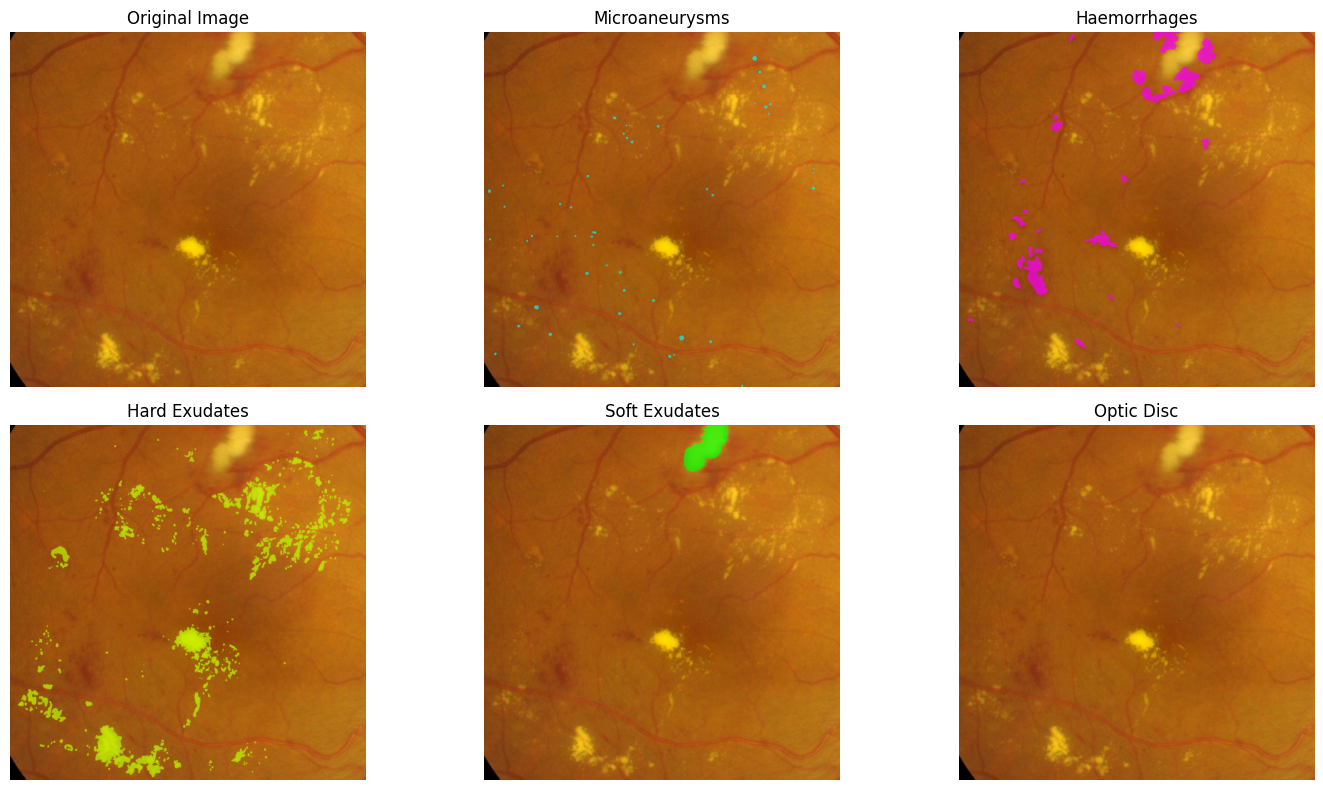

In [6]:
idx = random.randint(0, len(train_set) - 1)
image, mask = train_set.__getitem__(idx)
print(torch.unique(mask))
visualize_image_masks(image, mask)

tensor([0, 1])


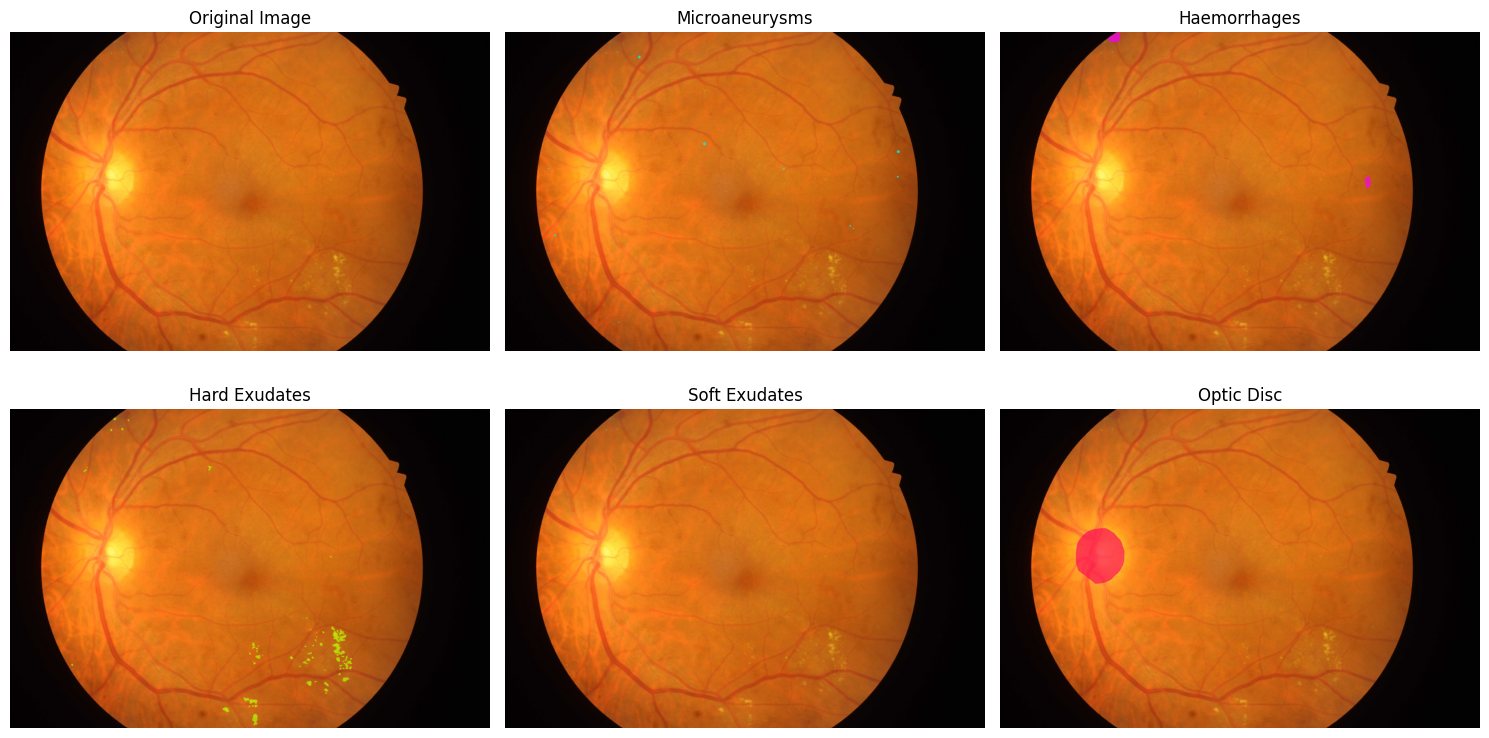

In [7]:
idx = random.randint(0, len(val_set) - 1)
image, mask = val_set.__getitem__(idx)
print(torch.unique(mask))
visualize_image_masks(image, mask)